### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [4]:
# Check for Null values in data. 
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
# Check for duplicates
data.duplicated().value_counts(dropna=False)

False    12610
True        74
dtype: int64

In [6]:
for v in data.columns:
    print(data[v].name)
    print('----------------------')
    print(data[v].value_counts(dropna=False))

destination
----------------------
No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64
passanger
----------------------
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64
weather
----------------------
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64
temperature
----------------------
80    6528
55    3840
30    2316
Name: temperature, dtype: int64
time
----------------------
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64
coupon
----------------------
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64
expiration
----------------------
1d    7091
2h    5593
Name: expiration, dtype: int64
gender
----------------------
Female    6511
Male      6173
Name: gender, dtype: int64
age
-------------------

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# From the above observations,

# 1. Car has most nulls, either we could assume the null to be regular car or we could drop the column. 
data.drop(columns=['car'], inplace=True)

In [8]:
# While there are nulls in customer preference data, if there is atleast one of it has data, it can be useful, 
# so check if there are rows with all nulls..
indexToDel = data.query('Bar.isnull() & CoffeeHouse.isnull() & CarryAway.isnull() & RestaurantLessThan20.isnull() & Restaurant20To50.isnull()').index
data.drop(indexToDel , inplace=True)
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                      65
CoffeeHouse             175
CarryAway               109
RestaurantLessThan20     88
Restaurant20To50        147
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [9]:
# Remove duplicates
print(len(data.index))
data.drop_duplicates()
print(len(data.index))

12642
12642


In [10]:
# Set Acceptance to "Accepted/Rejected" for better graphing.
data["CouponAccepted"] = np.where(data["Y"] == 1, "Accepted", "Rejected")
data["CouponAccepted"].value_counts()

Accepted    7181
Rejected    5461
Name: CouponAccepted, dtype: int64

In [11]:
# Direction same and opp could be consolidated to single column direct with same vs opp as values.
data["Direction"] = np.where(data["direction_same"] == 1, "Same", "Opposite")

4. What proportion of the total observations chose to accept the coupon? 



In [12]:
# Check the counts for column Y that has a distribution of total coupon acceptance.
# Change Y to "Accepted/Rejected" to have a better graph labels.
df_coupon_acceptance = data["CouponAccepted"].value_counts().reset_index()
df_coupon_acceptance.columns = ['CouponAccepted', 'counts']
df_coupon_acceptance["percentage"] =  (df_coupon_acceptance['counts'] / df_coupon_acceptance['counts'].sum()) * 100
print(df_coupon_acceptance)

  CouponAccepted  counts  percentage
0       Accepted    7181   56.802721
1       Rejected    5461   43.197279


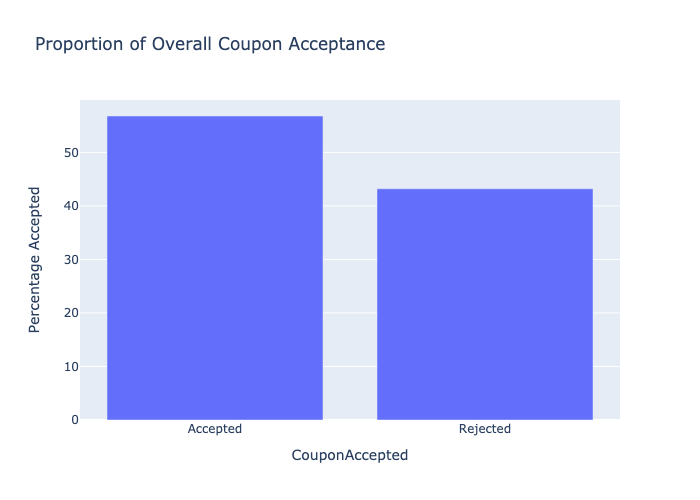

In [14]:
# About 57% of customers chose to accept the coupon. 
# plotting it in a bar chart..
fig=px.bar(df_coupon_acceptance, x="CouponAccepted", y ="percentage",
    labels={"index": "Coupon Accepted", "percentage": "Percentage Accepted"},
        title="Proportion of Overall Coupon Acceptance")
fig.show("png")

5. Use a bar plot to visualize the `coupon` column.

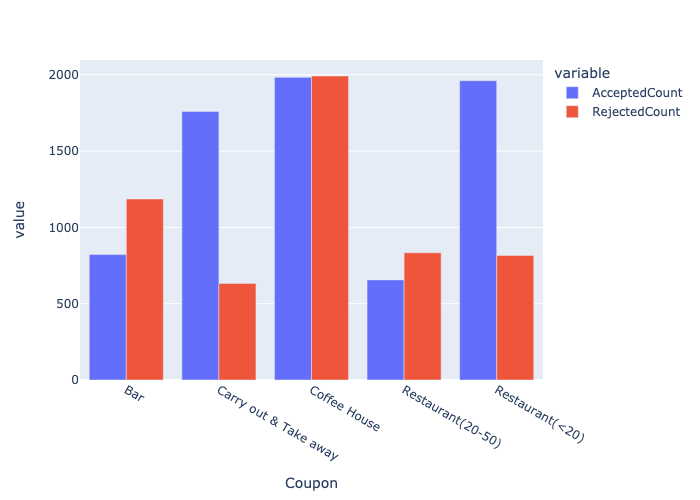

In [15]:
# Calculate acceptance ratio by coupon type and create a bar chart. 
# Doing a group bar chart reveal that 
# 1. CarryOut & Take Away & Small Restaurants (most likely fast foods) have a higher acceptance ratios.
df_coupons = data.groupby('coupon').agg(
    {'CouponAccepted': [lambda x: (x=='Accepted').sum(), 
                        lambda x: (x=='Rejected').sum()]}).reset_index()
df_coupons.columns = ['Coupon', 'AcceptedCount', 'RejectedCount']
fig=px.bar(df_coupons, x="Coupon", y=["AcceptedCount","RejectedCount"], barmode='group')
fig.show("png")

6. Use a histogram to visualize the temperature column.

In [30]:
# Check values for temperature
data["temperature"].value_counts()

80    6496
55    3830
30    2316
Name: temperature, dtype: int64

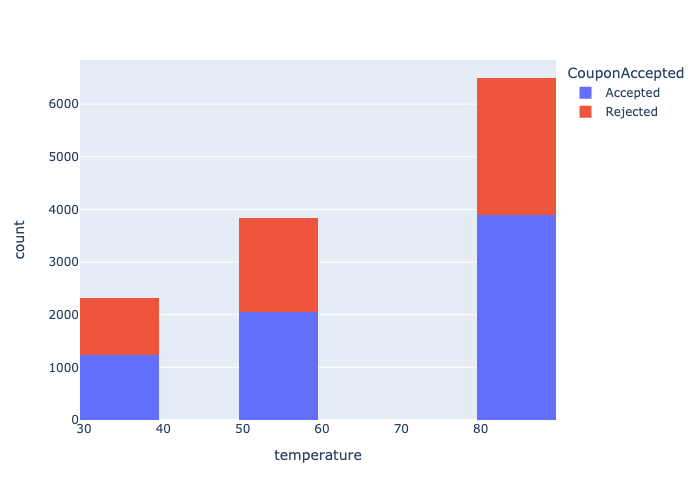

In [16]:
fig = px.histogram(data, x="temperature", nbins=10, color="CouponAccepted")
fig.show("png")

(array([1776.,    0.,    0.,    0.,    0., 2599.,    0.,    0.,    0.,
        1086.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

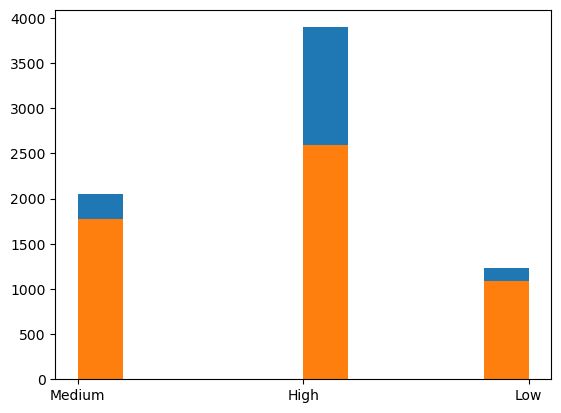

In [17]:
# Since temperature values are pretty static, Replacing temperature values with low/medium/high provides better plotting.
data["TemperatureRange"] = np.where(data["temperature"] == 30, "Low", data["temperature"])
data["TemperatureRange"] = np.where(data["TemperatureRange"] == "55", "Medium", data["TemperatureRange"])
data["TemperatureRange"] = np.where(data["TemperatureRange"] == "80", "High", data["TemperatureRange"])
data["TemperatureRange"].value_counts()

# I also wanted to layer the plot by acceptance instead of stacking.
plt.hist(data=data.query('Y == 1'), x="TemperatureRange")
plt.hist(data=data.query('Y == 0'), x="TemperatureRange")

# This shows the high proportion of acceptance in high temperature


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
# Create bar coupons data frame.
bar_coupons = data.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


  CouponAccepted  counts  percentage
0       Rejected    1186   59.063745
1       Accepted     822   40.936255


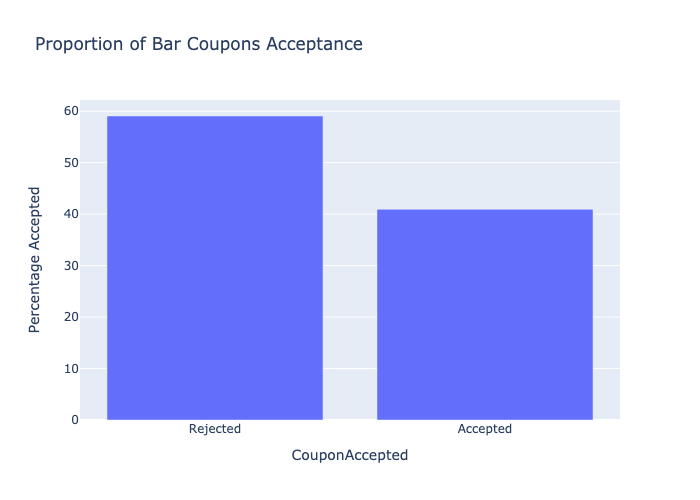

In [19]:
# Compute Bar coupon acceptance ratio
bar_coupon_acceptance = bar_coupons["CouponAccepted"].value_counts().reset_index()
bar_coupon_acceptance.columns = ['CouponAccepted', 'counts']
bar_coupon_acceptance["percentage"] =  (bar_coupon_acceptance['counts'] / bar_coupon_acceptance['counts'].sum()) * 100
print(bar_coupon_acceptance)

# Plot using a bar chart
fig = px.bar(bar_coupon_acceptance, x="CouponAccepted", y ="percentage",
    labels={"index": "Coupon Accepted", "percentage": "Percentage Accepted"},
        title="Proportion of Bar Coupons Acceptance")
fig.show("png")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [20]:
# Check the values.
bar_coupons["Bar"].value_counts(dropna=False)

never    830
less1    570
1~3      397
4~8      150
gt8       49
NaN       12
Name: Bar, dtype: int64

In [21]:
# There are nulls, Remove them.
bar_coupons=bar_coupons.dropna()
bar_coupons["Bar"].value_counts(dropna=False)

never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

In [22]:
# Cleanup to get clean stats for proportion.
def less_than_3_conditions(Bar):
    if  (Bar == 'less1') | (Bar == 'never') | (Bar == '1~3')   :   return "Yes"
    else: return "No"
less_than_3_calc      = np.vectorize(less_than_3_conditions)
bar_coupons["LessThan3"] = less_than_3_calc(bar_coupons["Bar"])

In [23]:
# Compute acceptance ratio by less than 3 computed above
bar_coupons_g = bar_coupons.groupby(['LessThan3', 'CouponAccepted']).size().reset_index()
bar_coupons_g['percentage'] = bar_coupons.groupby(['LessThan3', 'CouponAccepted']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
bar_coupons_g.columns = ['LessThan3', 'CouponAccepted', 'Counts', 'Percentage']
print(bar_coupons_g)

  LessThan3 CouponAccepted  Counts  Percentage
0        No       Accepted     147   76.165803
1        No       Rejected      46   23.834197
2       Yes       Accepted     641   37.267442
3       Yes       Rejected    1079   62.732558


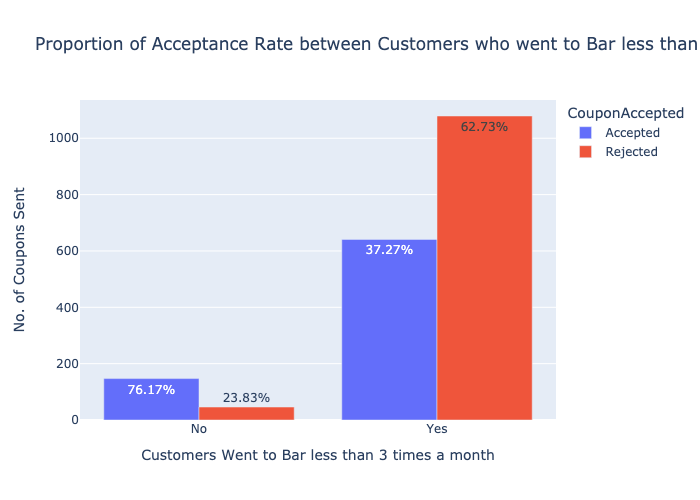

In [24]:
# Draw a bar chart
fig = px.bar(bar_coupons_g, x='LessThan3', y=['Counts'], color='CouponAccepted', 
    text=bar_coupons_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)), barmode="group",
    labels={"LessThan3": "Customers Went to Bar less than 3 times a month", "value": "No. of Coupons Sent"},
    title="Proportion of Acceptance Rate between Customers who went to Bar less than 3 times a month vs others.")
fig.show("png")

#### Observation

Acceptance ratio was higher for customers who visited bar more than 3 times a month. However the volume of customers who visit the bar less than 3 times a month was higher.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
# Create a column to indicate more than one month visit to bar.
def more_than_month(Bar):
    if  (Bar == '1~3') | (Bar == '4~8') | (Bar == 'gt8')   :   return "Yes"
    else: return "No"
more_than_month_calc      = np.vectorize(more_than_month)
bar_coupons["more_than_month"] = more_than_month_calc(bar_coupons["Bar"])
bar_coupons["more_than_month"].value_counts()

No     1341
Yes     572
Name: more_than_month, dtype: int64

In [26]:
# Cleanup up age - make it numeric so we can filter > 25.
bar_coupons["age"].value_counts()
bar_coupons["age"] = np.where(bar_coupons["age"] == 'below21', 20, bar_coupons["age"])
bar_coupons["age"] = np.where(bar_coupons["age"] == '50plus', 51, bar_coupons["age"])
bar_coupons["age"] = bar_coupons["age"].astype('int64')

In [27]:
# Compute customers with age 25 and bar visits more than a month.
bar_coupons["age_25_bar_1_month"] = np.where((bar_coupons["age"] > 25) & (bar_coupons["more_than_month"] == "Yes"), "Yes", "No")

# Compute acceptance rate by the above criteria
bar_coupons25_g = bar_coupons.groupby(['age_25_bar_1_month', 'CouponAccepted']).size().reset_index()
bar_coupons25_g['percentage'] = bar_coupons.groupby(['age_25_bar_1_month', 'CouponAccepted']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
bar_coupons25_g.columns = ['age_25_bar_1_month', 'CouponAccepted', 'Counts', 'Percentage']
print(bar_coupons25_g)

  age_25_bar_1_month CouponAccepted  Counts  Percentage
0                 No       Accepted     510   33.774834
1                 No       Rejected    1000   66.225166
2                Yes       Accepted     278   68.982630
3                Yes       Rejected     125   31.017370


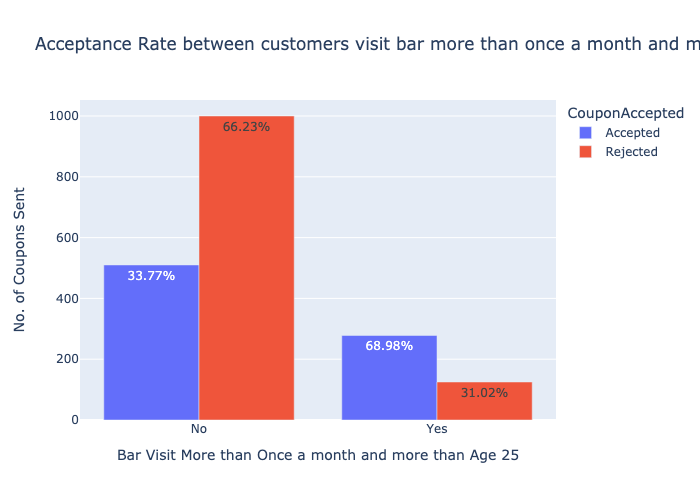

In [28]:
# Draw a bar chart
fig= px.bar(bar_coupons25_g, x='age_25_bar_1_month', y=['Counts'], color='CouponAccepted', 
    text=bar_coupons25_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)), barmode="group",
    labels={"age_25_bar_1_month": "Bar Visit More than Once a month and more than Age 25", "value": "No. of Coupons Sent"},
    title="Acceptance Rate between customers visit bar more than once a month and more then age of 25 to all others.")
fig.show("png")

#### Observation

Customers who visited bar more than once a month and over the age 25 has higher coupon acceptance ratio(about 69%) than the others.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [29]:
# Compute customers with visits more than a month that were not a kid and have occupation other than "Farming Fishing & Forestry"
bar_coupons["non_kid_non_farming_bar_1_month"] = np.where((bar_coupons["passanger"] !='Kids(s)') 
                                                          & (bar_coupons["more_than_month"] == "Yes") 
                                                          & (bar_coupons["occupation"] !='Farming Fishing & Forestry'), "Yes", "No")

# Compute acceptance rate by the above criteria
bar_coupons_non_kid_non_farm_g = bar_coupons.groupby(['non_kid_non_farming_bar_1_month', 'CouponAccepted']).size().reset_index()
bar_coupons_non_kid_non_farm_g['percentage'] = bar_coupons.groupby(['non_kid_non_farming_bar_1_month', 'CouponAccepted']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
bar_coupons_non_kid_non_farm_g.columns = ['non_kid_non_farming_bar_1_month', 'CouponAccepted', 'Counts', 'Percentage']
print(bar_coupons_non_kid_non_farm_g)

  non_kid_non_farming_bar_1_month CouponAccepted  Counts  Percentage
0                              No       Accepted     396   29.530201
1                              No       Rejected     945   70.469799
2                             Yes       Accepted     392   68.531469
3                             Yes       Rejected     180   31.468531


In [30]:
# Draw a bar chart
fig=px.bar(bar_coupons_non_kid_non_farm_g, x='non_kid_non_farming_bar_1_month', y=['Counts'], color='CouponAccepted', 
    text=bar_coupons_non_kid_non_farm_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)), barmode="group",
    labels={"non_kid_non_farming_bar_1_month": "Bar Visit More than Once a month and not a kid and non farming, fishing..", "value": "No. of Coupons Sent"},
    title="Acceptance Rate between customers visit bar more than once a month and not a kid and non farming, fishing...")
fig.show()

#### Observation
Customers who visite more than once a month and not a kid and non-farming, fishing & forestry occupation had higher coupon acceptance ratio than others.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [31]:
bar_coupons.groupby(["passanger","CouponAccepted", "more_than_month"]).size()

bar_coupons["RestaurantLessThan20"].value_counts()

1~3      839
4~8      548
less1    312
gt8      186
never     28
Name: RestaurantLessThan20, dtype: int64

In [32]:
# Compute baseline properties.

bar_coupons["non_kid"] = np.where((bar_coupons["passanger"] !='Kids(s)'), "Yes", "No")
bar_coupons["widow"] = np.where((bar_coupons["maritalStatus"] =='Widowed'), "Yes", "No")
bar_coupons["under_30"]= np.where((bar_coupons["age"] <30), "Yes", "No")
bar_coupons["income_under_50k"]= np.where((bar_coupons["income"] =="$25000 - $37499") 
                                                          | (bar_coupons["income"] == "$37500 - $49999")
                                        | (bar_coupons["income"] == "Less than $12500") 
                                         | (bar_coupons["income"] == "$12500 - $24999"), "Yes", "No")

bar_coupons["cheap_restaurants_4_times"]= np.where((bar_coupons["RestaurantLessThan20"] =="4~8") 
                                                          | (bar_coupons["RestaurantLessThan20"] == "gt8")
                                                   , "Yes", "No")


  more_than_month_n_kid_n_widow CouponAccepted  Counts  Percentage
0                            No       Accepted     396   29.530201
1                            No       Rejected     945   70.469799
2                           Yes       Accepted     392   68.531469
3                           Yes       Rejected     180   31.468531


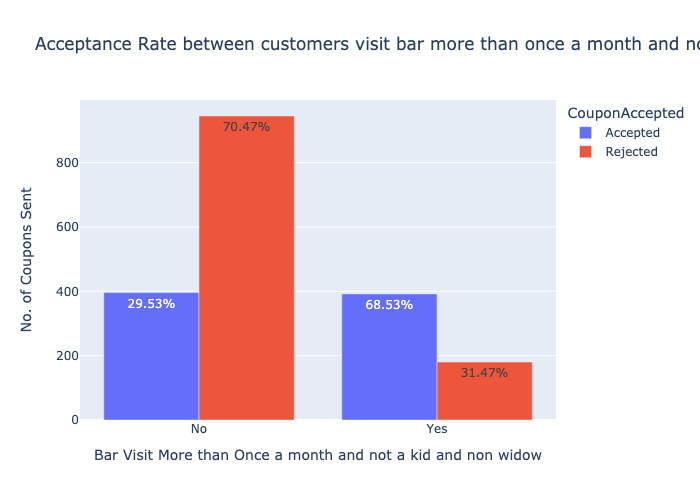

In [55]:
# Scenario1: Go to bars more than once a month, had passengers that were not a kid, and were not widowed.

bar_coupons["more_than_month_n_kid_n_widow"] = np.where((bar_coupons["more_than_month"] =='Yes') 
                                                        & (bar_coupons["non_kid"] =='Yes')
                                                        & (bar_coupons["widow"] =='No') 
                                                        , "Yes", "No")
bar_coupons_scenario_1 = bar_coupons.groupby(['more_than_month_n_kid_n_widow', 'CouponAccepted']).size().reset_index()
bar_coupons_scenario_1['percentage'] = bar_coupons.groupby(['more_than_month_n_kid_n_widow', 'CouponAccepted']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
bar_coupons_scenario_1.columns = ['more_than_month_n_kid_n_widow', 'CouponAccepted', 'Counts', 'Percentage']
print(bar_coupons_scenario_1)

# Draw a bar chart
fig=px.bar(bar_coupons_scenario_1, x='more_than_month_n_kid_n_widow', y=['Counts'], color='CouponAccepted', 
    text=bar_coupons_scenario_1['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)), barmode="group",
    labels={"more_than_month_n_kid_n_widow": "Bar Visit More than Once a month and not a kid and non widow", "value": "No. of Coupons Sent"},
    title="Acceptance Rate between customers visit bar more than once a month and not a kid and non widow")
fig.show("png")

  more_than_month_u_age_30 CouponAccepted  Counts  Percentage
0                       No       Accepted     552   34.826498
1                       No       Rejected    1033   65.173502
2                      Yes       Accepted     236   71.951220
3                      Yes       Rejected      92   28.048780


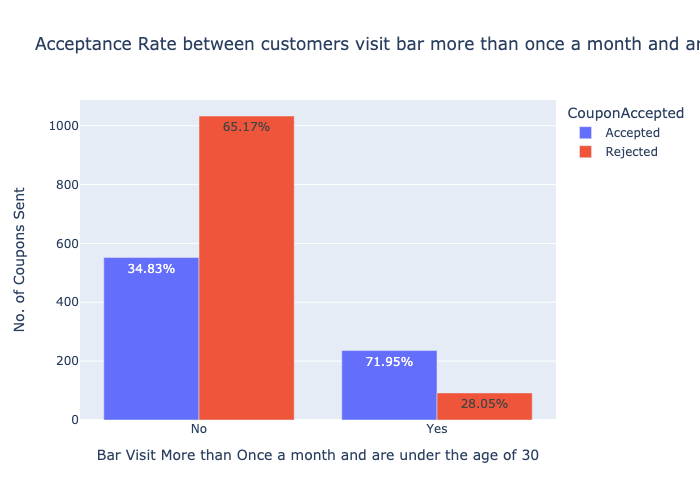

In [35]:
# Scenario2: go to bars more than once a month and are under the age of 30

bar_coupons["more_than_month_u_age_30"] = np.where((bar_coupons["more_than_month"] =='Yes') 
                                                        & (bar_coupons["under_30"] =='Yes')
                                                        , "Yes", "No")
bar_coupons_scenario_2 = bar_coupons.groupby(['more_than_month_u_age_30', 'CouponAccepted']).size().reset_index()
bar_coupons_scenario_2['percentage'] = bar_coupons.groupby(['more_than_month_u_age_30', 'CouponAccepted']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
bar_coupons_scenario_2.columns = ['more_than_month_u_age_30', 'CouponAccepted', 'Counts', 'Percentage']
print(bar_coupons_scenario_2)

# Draw a bar chart
fig=px.bar(bar_coupons_scenario_2, x='more_than_month_u_age_30', y=['Counts'], color='CouponAccepted', 
    text=bar_coupons_scenario_2['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)), barmode="group",
    labels={"more_than_month_u_age_30": "Bar Visit More than Once a month and are under the age of 30", "value": "No. of Coupons Sent"},
    title="Acceptance Rate between customers visit bar more than once a month and are under the age of 30")
fig.show("png")

In [36]:
# Scenario3: go to cheap restaurants more than 4 times a month and income is less than 50K.

bar_coupons["cheap_res_u_50k"] = np.where((bar_coupons["cheap_restaurants_4_times"] =='Yes') 
                                                        & (bar_coupons["income_under_50k"] =='Yes')
                                                        , "Yes", "No")
bar_coupons_scenario_3 = bar_coupons.groupby(['cheap_res_u_50k', 'CouponAccepted']).size().reset_index()
bar_coupons_scenario_3['percentage'] = bar_coupons.groupby(['cheap_res_u_50k', 'CouponAccepted']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
bar_coupons_scenario_3.columns = ['cheap_res_u_50k', 'CouponAccepted', 'Counts', 'Percentage']
print(bar_coupons_scenario_3)

# Draw a bar chart
fig = px.bar(bar_coupons_scenario_3, x='cheap_res_u_50k', y=['Counts'], color='CouponAccepted', 
    text=bar_coupons_scenario_3['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)), barmode="group",
    labels={"cheap_res_u_50k": "Customers who go to cheap restaurants more than 4 times a month and income 50K", "value": "No. of Coupons Sent"},
    title="Acceptance Rate between customers who go to cheap restaurants more than 4 times a month and income 50K")
fig.show()

  cheap_res_u_50k CouponAccepted  Counts  Percentage
0              No       Accepted     636   40.253165
1              No       Rejected     944   59.746835
2             Yes       Accepted     152   45.645646
3             Yes       Rejected     181   54.354354


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<AxesSubplot:xlabel='cheap_res_u_50k', ylabel='Counts'>

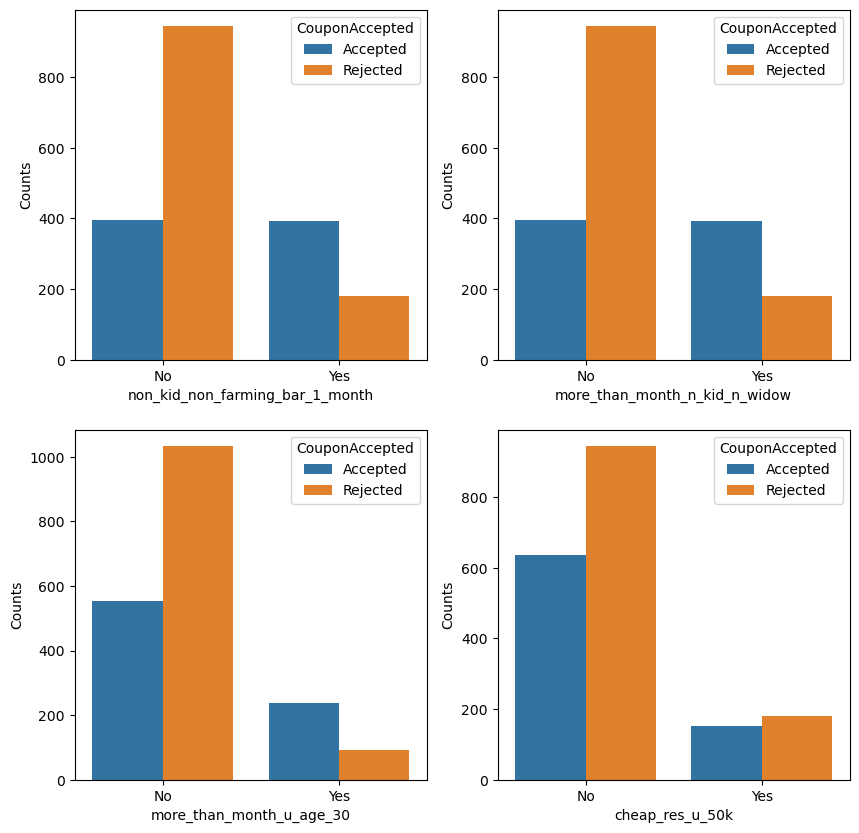

In [86]:
# Putting all the pieces together using Sub plots:

fig, axes = plt.subplots(2, 2, figsize=(10,10))

#create chart in each subplot
sns.barplot(data=bar_coupons_non_kid_non_farm_g,x="non_kid_non_farming_bar_1_month", y="Counts",
            hue="CouponAccepted", ax=axes[0,0])
sns.barplot(data=bar_coupons_scenario_1,x="more_than_month_n_kid_n_widow", y="Counts",
            hue="CouponAccepted", ax=axes[0,1])
sns.barplot(data=bar_coupons_scenario_2, x='more_than_month_u_age_30', y='Counts', 
            hue="CouponAccepted", ax=axes[1,0])
sns.barplot(data=bar_coupons_scenario_3, x='cheap_res_u_50k', y='Counts', 
            hue="CouponAccepted", ax=axes[1,1])


Based on the above analysis, 

1. Customers who visited bar more often (more than once a month) accepted the bar coupons the most.
2. Customer who had kids had less acceptance.
3. Customer who are non-widowed and had no kids had more acceptance on the bar coupons.
4. Customers with low income (under 50k) had less acceptance rate on the coupons.
5. Customer under the age of 30 had more acceptance when they visit the bar more often. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  